# Road Traffic Accidents in Addis Abeba
### presenting: Meital padwa, Sarha Hazziza,Eyal Shauli , Yarden Farber.
1. [Understand our data](#section1)
2. [Visualize interesting data](#section2)
3. [Men & Women](#section3)
4. [Kind of accidents](#section4)
5. [Accidents hours](#section5)
6. [Level of Education](#section6)
7. [Age & Experience](#section7)
<br>
<br>

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
colors =['#75bbfd','#7bf2da','#ff6cb5','#7af9ab', '#8b88f8','#ffb3e6','#42b395','#aefd6c']

## 1. Understand our data <a class='anchor' id='section1'>

**First of all we will import our data and take a look:**

In [68]:
rta=pd.read_csv('https://raw.githubusercontent.com/meitalhp/DataSet_project/main/RTA%20Dataset.csv')
rta.tail(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [3]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

**As you can see, our dataframe contains many data type objects.
Therefore, we've got a lot of work to do...**

## 2. Visualize interesting data <a class='anchor' id='section2'>

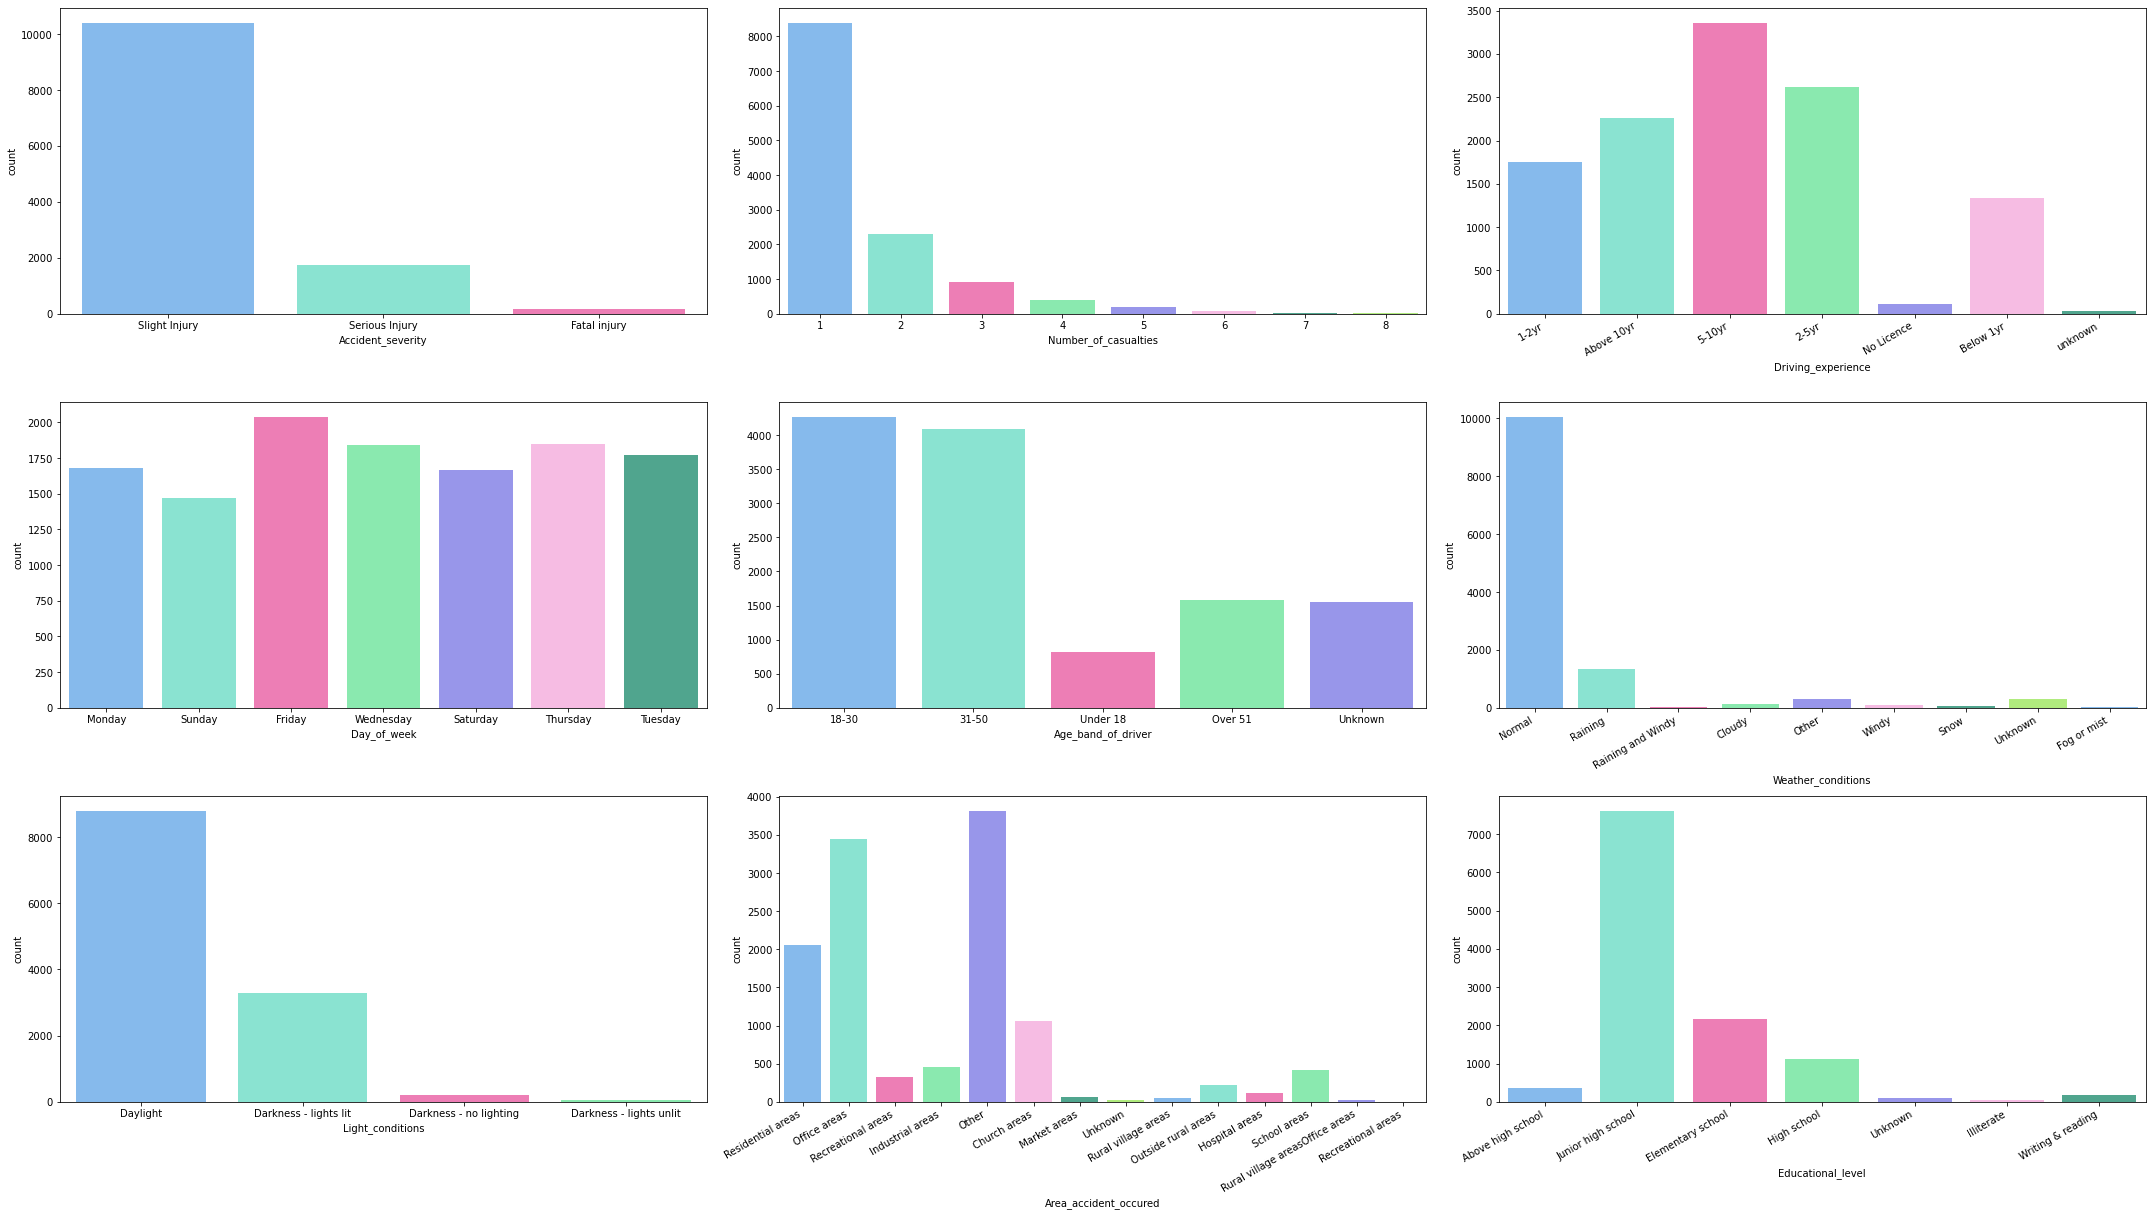

In [14]:
fig, axes = plt.subplots(figsize=(30,17), ncols=3, nrows=3)
sns.countplot(ax=axes[(0,0)], x="Accident_severity", data=rta, palette=colors)
sns.countplot(ax=axes[(0,1)], x="Number_of_casualties", data=rta, palette=colors)
s=sns.countplot(ax=axes[(0,2)], x="Driving_experience", data=rta,palette=colors)
sns.countplot(ax=axes[(1,0)], x="Day_of_week", data=rta,palette=colors)
sns.countplot(ax=axes[(1,1)], x="Age_band_of_driver", data=rta,palette=colors)
g=sns.countplot(ax=axes[(1,2)], x="Weather_conditions", data=rta,palette=colors)
sns.countplot(ax=axes[(2,0)], x="Light_conditions", data=rta,palette=colors)
i=sns.countplot(ax=axes[(2,1)], x="Area_accident_occured", data=rta,palette=colors)
j=sns.countplot(ax=axes[(2,2)], x="Educational_level", data=rta,palette=colors)
s.set_xticklabels(s.get_xticklabels(), rotation=30,ha='right')
g.set_xticklabels(g.get_xticklabels(), rotation=30,ha='right')
i.set_xticklabels(i.get_xticklabels(), rotation=30,ha='right')
j.set_xticklabels(j.get_xticklabels(), rotation=30,ha='right')
fig.tight_layout()
plt.show()

**Here we wanted to visualize some of the main columns that seemed to us interesting.
We chose to use countplots, because of the many data type objects.**
<div>
<b>Later on, we will focus on two of those countplots.<b>

---
## 3. Men & Women <a class='anchor' id='section3'>

**Let's break the myth about men and women: <br>Who is the best driver ?** 

Quick Survey:<br>https://docs.google.com/forms/d/e/1FAIpQLSf_kpfUnD3WUkD7z_UUVKmSrYaLO_ilqW-lJJTbAvc9_6PT4Q/viewform?usp=sf_link

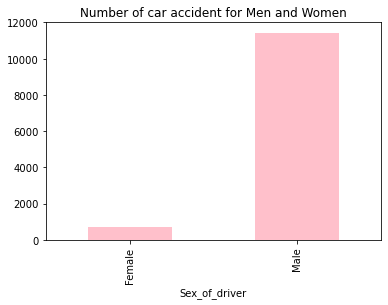

In [5]:
sex_of_driver=rta.groupby('Sex_of_driver').size()
sex_of_driver=sex_of_driver.drop('Unknown')
sex_of_driver.plot.bar(color='pink', title='Number of car accident for Men and Women');

>We broke the myth ! According to our data, there are much more men involved in car accidents than women, at least in Addis Abeba !<br>
>
>However, it seemed to us very strange that the difference was so big: 5.7% for women against 94.3% for men.<br>
>From our point of view, it might be because there are more men drivers than women drivers in Addis Abeba.<br>
>
>Therefore we looked at statistics in Israel and found almost the same results.<br>
>https://www.ynet.co.il/articles/0,7340,L-5148649,00.html

#### Women vs Men in Israel:
<br>
<img src='https://raw.githubusercontent.com/meitalhp/DataSet_project/main/images/MenWomanIL.jpg', width=600>

---
## 4. Kind of accidents <a class='anchor' id='section4'>

We will focus on the Type of Collision column to find out what kind of accidents occur in Addis Abeba.

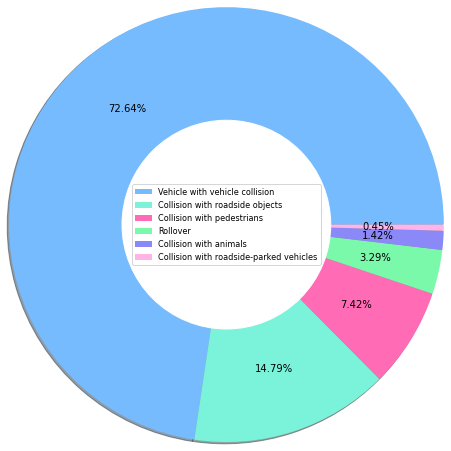

In [20]:
collision=rta['Type_of_collision'].value_counts()
typecoll=list(collision.index.values)
valuecoll=list(collision.to_numpy())
plt.pie(valuecoll[0:6],autopct='%1.2f%%',pctdistance=0.7, shadow=True, radius=2.5, colors=colors)
cir=plt.Circle((0,0),1.2,color='white')
plt.gca().add_artist(cir)
plt.legend(typecoll, loc='center', prop={'size':8.1},fancybox=True)
plt.show()

> Observation: We can see that most of the accidents are vehicle with vehicle collision. One interesting thing is that 1.42% of accidents are because of collision with animals.

--- 
## 5. Accidents hours <a class='anchor' id='section5'>

When you think of accidents, we usually think that they occur when the conditions aren't the best, for exemple when driving at night.<br><br>
**Let's try and see what is the most dangerous hour:**

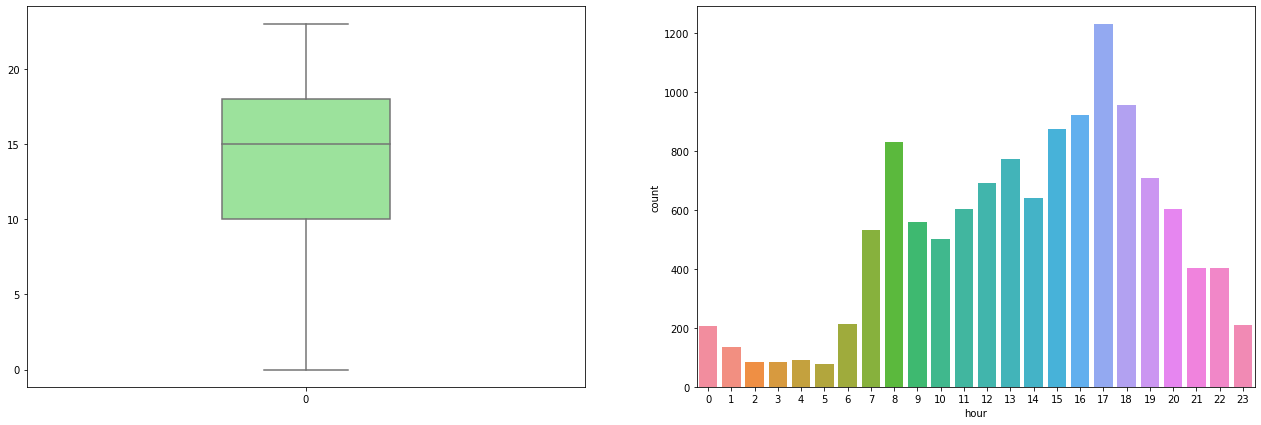

In [67]:
from datetime import date
fig, axes = plt.subplots(figsize=(22,7), ncols=2)
rta['hour']=pd.to_datetime(rta.Time)
rta['hour']=pd.DatetimeIndex(rta.hour).hour
sns.boxplot(data=rta['hour'],color='lightgreen', ax=axes[0],orient="v",width=0.3)
sns.countplot(rta['hour'], ax=axes[1], saturation= 0.9);

> **Observations:** It is clear that the most dangerous hours, in Addis Abeba, are between 15:00 and 18:00.
>
>
> By the boxplot scattering we couldn't understand clearly the hour with the maximum amount of accidents. <br>That's why we added the countplot bars, that allowed us to visualise that the most dangerous hour was 17:00.
>
>
>**Conclusion:** Our expectations were not conclusive. The most dangerous hour is during the rush hour times. 
>
> **Suggestion:** How about reinforcing police presence during these hours to reduce car accidents ?

#### Meskel Square in Addis Abeba
As you can see, there are no cops, no traffic lights and no road markings or signs.
<br>
<img src='https://raw.githubusercontent.com/meitalhp/DataSet_project/main/images/Meskel_Square.jpg'>

---
## 6. Level of Education <a class='anchor' id='section6'>

**We will now check if there is a link between Educational level and Accidents.**
<br> <br>
To do so, we chose to build a heatmap that will associate Educational Level of drivers, the Number of casualties and the Severity of the accidents.

We had to transform the data in the columns we would use because most of it were categorical data.

In [8]:
rta_new=rta.loc[(rta.Educational_level  == 'Junior high school')|(rta.Educational_level == 'Elementary school')|(rta.Educational_level == 'High school')|(rta.Educational_level == 'Above high school')|(rta.Educational_level =='Writing & reading')].copy()
rta_new=rta.loc[(rta.Accident_severity == 'Slight Injury')|(rta.Accident_severity == 'Serious Injury')|(rta.Accident_severity == 'Fatal injury')].copy()
features=['Accident_severity','Number_of_casualties','Educational_level']
rta_new=pd.get_dummies(rta_new[features])

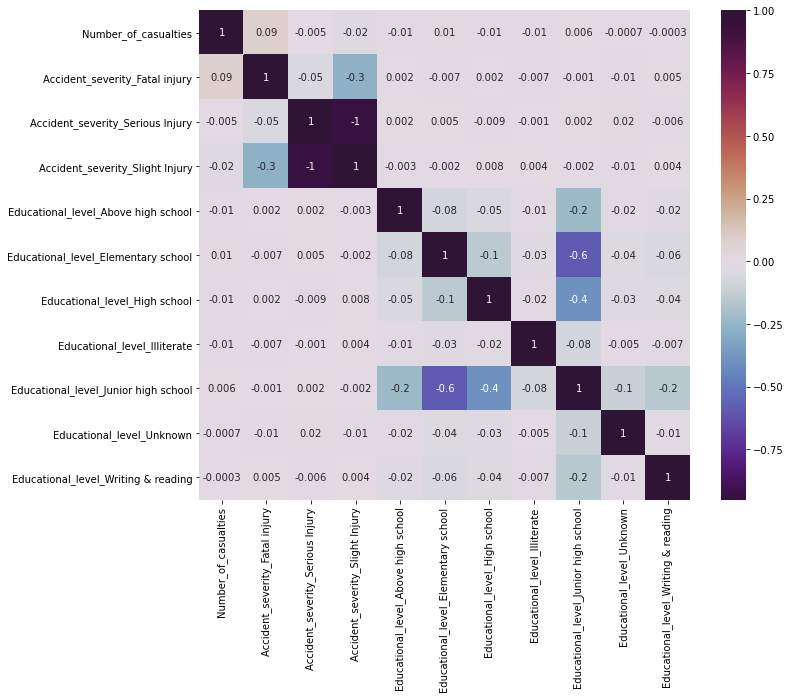

In [9]:
corrs = rta_new.corr()
plt.figure(figsize=(11,9))
sns.heatmap(corrs, cmap='twilight_shifted', center=0, annot = True, fmt='.1g');

> We found no correlation between Accident severity and Educational Level. There is no connection or influence between them.

---
## 7. Age & Experience <a class='anchor' id='section7'>

As we said before, we came back to two of the countplots from the beginning.

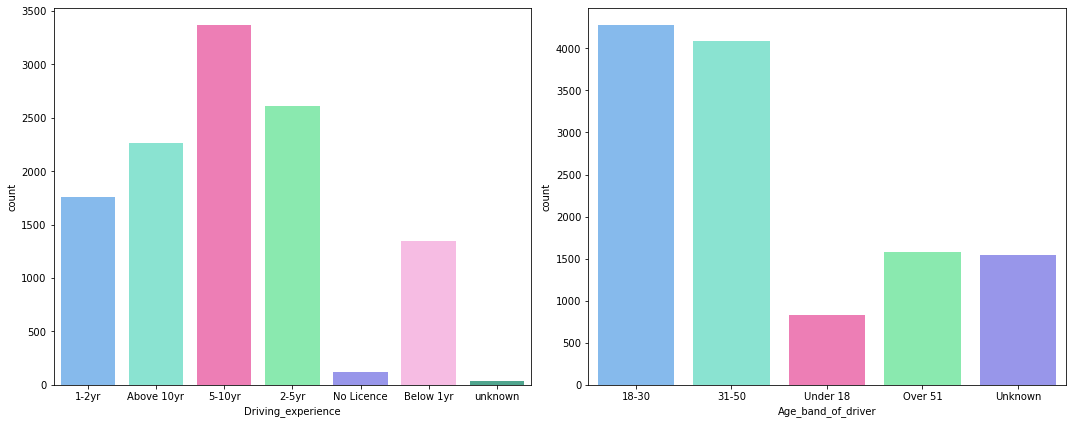

In [16]:
fig, axes = plt.subplots(figsize=(15,6), ncols=2)
sns.countplot(ax=axes[0], x="Driving_experience", data=rta,palette=colors)
sns.countplot(ax=axes[1], x="Age_band_of_driver", data=rta,palette=colors)
fig.tight_layout()
plt.show()

>**Observations:** On the driving experience plot, we can see that more accidents occured when people had more than 5 years experience than when people had almost no experience at all. Also there is no big difference between young and adults as we see in the second plot.
>  
> That can explain why in Israel (for example) after 5 years, the government ask of us to take a driving refresher couse.
>
>
> **Conclusion:** We can wonder why it happens, maybe after an amount of years of the road, people start to behave with carelessness. They probably begin to feel more confident on the road and act with more automacy. <br>
>This makes sense since we found that most of the drivers in Addis Abeba are working ad drivers. (Employee in the Vehicle driver relation column)
>
>The lack of difference between young and adults drivers is explained now, when we know that taxi drivers are the majority drivers in Addis Abeba.<br>
>Article about taxi drivers in Addis Abeba:<br>https://www.ezega.com/news/NewsDetails?Page=heads&NewsID=2900

#### Contrast with Israel
<br>
<img src='https://raw.githubusercontent.com/meitalhp/DataSet_project/main/images/AgeIL.jpeg', width=800>

In [69]:
pd.DataFrame(rta.Vehicle_driver_relation.value_counts())

,Vehicle_driver_relation
Employee,9627
Owner,1973
Other,123
Unknown,14


---
## Summary:
We started by exposing the contrast between the numbers of **men and women** involved in car accidents. Then we saw what **kind of accidents** are the most usual in Addis Abeba. In addition, we conclude that the **most dangerous hours** are during rush hours. And then, we tried to find a link between **Level of Education** and severity of accident which unfortunatly wasn't conclusive at all. Finally, we found that **Age and Experience** on the road have an impact on the number of accidents.